In [1]:
%matplotlib inline
import scipy.integrate as integrate # get the ODE module
import matplotlib.pyplot as plt # plotting module
import numpy as np # numpy module

import matplotlib.pylab as pylab

# Session 6 Part 3: How does `odeint` work?

<div class="alert alert-block alert-info"> **IMPORTANT:** 

<p>To be able to solve differential equations reliably it helps if you understand something of how the solver work under the hood
<p> These ideas also forms the basis of more advanced methods such as finite element modelling
</div>

---

Let's open the Black Box of `odeint`


- Mostly, you will be able to use functions like `odeint` as a black box.
- However, the concepts that underly how it works are transferable and the basis for understanding more complicated schemes like Finite Element Modelling.
- We will look at finite differnce modelling below.

# 6. Simplified numerical integration

In this section we introduce the concept of numerical integration using relatively simple methods.

Section 7 outlines how `odeint` actually works - but the important concepts are introduce in this section.

## 6.1 What is finite difference discretisation?

- A finite difference is a mathmatical expression of the form:

$$f(x+h) - f(x)$$

where $h$ is the finite difference.

- This has become synomynous with the finite difference approximation for derivatives:

- The definition of the derivative is:

$$\frac{d}{{dx}}f\left( x \right) = \mathop {\lim }\limits_{\Delta \to 0} \frac{{f\left( {x + \Delta } \right) - f\left( x \right)}}{\Delta }$$

- Instead of letting $\Delta \to 0$ let it become a finite difference $\Delta = h$

$$\frac{d}{{dx}}f\left( x \right) \approx \frac{{f\left( {x + h } \right) - f\left( x \right)}}{h }$$

- Hence, we can approximate a function with a series of nodes with spacing $h$. The quality of this solution will clearly depend on the spacing of these nodes.

### 6.1a Three ways to discretise a 1st order derivative

![Finite difference approximation](http://slideplayer.com/slide/5162255/16/images/2/Finite+difference+approximation+to+derivatives.jpg)

#### Forward difference

$$\frac{dy}{dx} \approx \frac{ y_{n+1}-y_n } {h}$$

#### Backward difference

$$\frac{dy}{dx} \approx \frac{ y_{n}-y_{n-1} } {h}$$

#### Centered difference
$$\frac{dy}{dx} \approx \frac{ y_{n+1}-y_{n-1} } {2h}$$

---

## 6.2 [Euler's Method](https://www.khanacademy.org/math/differential-equations/first-order-differential-equations/eulers-method-tutorial/v/eulers-method) for solving ODEs

Solving a $1^{st}$ Order ODE using Euler's Method where the derivative is equal to some arbitary function $f$.

$$\frac{dy}{dx}=f(y,x) $$ 

At some node, $n$

$$  \frac{ y_{n+1}-y_n } {h} \approx f_n $$ 

Which we can rearrange to find the next value $y_{n+1}$ based on the current value $y_n$ and the value of the function at the current position $f_n$.

We want to know the next value of $y$ at time $n+1$ in terms of things we know.

Let's rearrange the above for $y_{n+1}$:

$$y_{n+1}=y_n+f_n.h$$

So, if we know:

- $y_n$: The current value of $y$ at time $n$
- $f_n$: And we have a function to calculate the derivative at $n$
- $h$: And we choose a timestep to update over

We can estimate the next value of $y$

<div class="alert alert-block alert-info"> **IMPORTANT:** 

<p>Convince yourself the discretisation above is just an approximation that is similar to the definition of the derivative. 

<p>Understand how you can approximate the next value based on the current. 

<p>For all the Euler examples in this notebook - make sure you can derive them in a similar manner to the example below
</div>

### 6.2a EXAMPLE: Euler's Method to solve a 1st order ODE

- Solve $$dy/dt=t$$

$$y_{n+1}=y_n+f_n.h$$

Becomes,

$$y_{n+1}=y_n+t.h$$

- Over the domain $y\in(0,2)$ 

- Using the initial condition $y(t=0)=0$ so `y[0]=0`



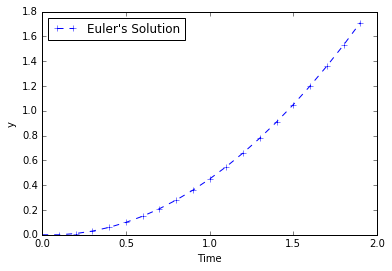

In [11]:
#############################################################
# Compute y iteratively using Finite Difference Forward Euler

h=0.1 # Stepsize

# Create output arrays
t = np.arange(0,2,h)    # Array of output times from 0 to 2 in 0.1 increments
y = np.empty_like(t)    # An empty array to store the y in

N = len(t)              # The length of t tells us how many interations are needed

y[0] = 0                # Set the first value in y to be the initial condition y(t=0)=0

# Numerially iterate over time using the forward Euler discretisation
for n in range(0,N-1):
    y[n+1] = y[n] + h * t[n]

plt.plot(t, y, "--+", label="Euler's Solution")
plt.xlabel("Time")         ;       plt.ylabel("y")
plt.legend(loc="upper left")



#### Let's plot the residuals (difference between Euler and analytic solution)

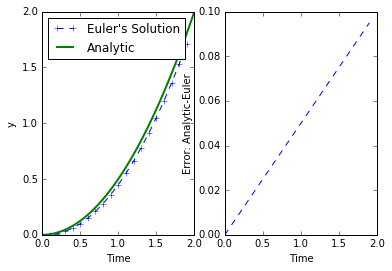

In [12]:
########################################
# Compute y using the analytic solution
t_analytic = np.arange(0,2,0.01)
y_analytic = t_analytic*t_analytic/2

#############################################################
# Compute y iteratively using Finite Difference Forward Euler

h=0.1 # Stepsize

# Create output arrays
t = np.arange(0,2,h)    # Array of output times from 0 to 2 in 0.1 increments
y = np.empty_like(t)    # An empty array to store the y in

N = len(t)              # The length of t tells us how many interations are needed

y[0] = 0                # Set the first value in y to be the initial condition y(t=0)=0

# Numerially iterate over time using the forward Euler discretisation
for n in range(0,N-1):
    y[n+1] = y[n] + h * t[n]

##############################################################
# Plot the results
    
plt.subplot(1,2,1)
plt.plot(t, y, "--+", label="Euler's Solution")
plt.plot(t_analytic, y_analytic, linewidth=2, label="Analytic")
plt.xlabel("Time")         ;       plt.ylabel("y")
plt.legend(loc="upper left")

plt.subplot(1,2,2)
plt.plot(t, t*t/2-y, "--")
plt.xlabel("Time")         ;       plt.ylabel("Error: Analytic-Euler")

The forward Euler systematically underpredicts in this case. 

#### Mathematical comparison of Euler with true solution for $dy/dt=t$

To understand how well this performs, we can rewrite the Euler solution

$$y_{n+1}=y_n+t.h$$

using the fact the $t = (n-1)h$:

$$y_{n+1}=y_n+(n-1)h^2$$

We substitute to reference the Euler solution back to the initial value:

$$\begin{align}
y_2=&y_1\\  
y_3=&y_2+h^2=&y_1+h^2\\
y_4=&y_3+2h^2=&y_1+3h^2\\
y_5=&y_4+3h^2=&y_1+6h^2
\end{align}$$

Which is equivalent to the general solution,

$$y_{n}=y_1+ \frac{(n-1)(n-2)}{2}h^2$$

The exact analytic solution is:
$$y_n = y_1+ \frac{(n-1)^2}{2} h^2$$

So Euler's method does a reasonable job in these circumstances.

---

## 6.3: Comparison of Euler, Implicit and Crank-Nicolson for solving $\frac{dy}{dt} = -Ay$


Let's find the numerical solution to
$$\frac{dy}{dt} = -Ay$$

over the domain $t \in [0,25]$ with $A = 0.3$.

Analytically, this problem is exponential decay!

### 6.3a Euler solution

For Euler, let's discretise as before:

$$  \frac{ y_{n+1}-y_n } {h} \approx -A y_n $$ 

Therefore,

<div class="alert alert-block alert-success">
$$y_{n+1} = y_n (1- Ah)$$
</div>

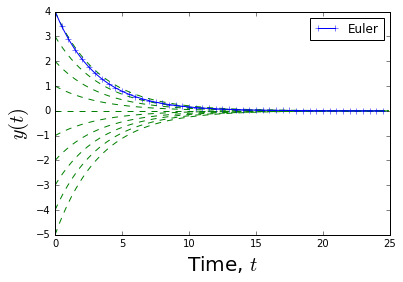

In [13]:
tMax=25
A = 0.3

# Plot the background exponential decay curves
t = np.arange(0,tMax,0.1)
y = np.exp(-t*A)
y_0 = np.arange(-5,5,1)
for i in y_0:
    plt.plot(t, i*y, '--g')

# Calculate Euler's solution
h = 0.5 # Timestep Size

t_Euler = np.arange(0,tMax,h)
N = len(t_Euler)

y_Euler = np.empty_like(t_Euler)
y_Euler[0] = 4

for n in range(0,N-1):
    y_Euler[n+1] = y_Euler[n]*(1 - h*A)

# Plot the solutions    
plt.plot(t_Euler,y_Euler, "-+", label="Euler")

plt.legend()
plt.xlabel("Time, $t$", fontsize=20)
plt.ylabel("$y(t)$", fontsize=20)

---

### 6.3b Implicit Solution (Backward difference)
  
-  __Euler's Method__ is an _explicit_ method where $y_{n+1}$ is explicitly in the equation which contains $f_n=y_n$. In other words, the future is calculated from the past:
  
  $$y_{n+1}=y_n+h f_n$$

- __The Implicit Method__ writes $f$ as a function of
    $y_{n+1},t_{n+1}$ to give:
$$
    y_{n+1}=y_n+ h f_{n+1}
$$

Depending on the form of $f$ this can be easily written in Python/Numpy or require a lot of work.

-  If $f$ depends on $y$ you will need to rearrange the
    expression to get a solution for $y_{n+1}$.
    
<div class="alert alert-block alert-info"> **IMPORTANT:** 

<p>Understand the similarities and differences between Euler and the Implicit method. 

<p>Understand how you can approximate the next value based on the current using the Implicit Method. 

<p>For all the Implicit examples in this notebook - make sure you can derive them in a similar manner to the example below
</div>
    
---
    
#### Solve $dy/dt= -Ay$, now using the Implicit Method

Consider the same problem as earlier: $dy/dt=Ay$

Which we write as 

<div class="alert alert-block alert-success">
$$\frac{dy}{dt} \approx \frac{y_{n+1}-y_n}{h}=-A y_{n+1}$$
</div>

After some rearrangement can be written as:

<div class="alert alert-block alert-success">
$$ y_{n+1}=\frac{y_n}{1+h A} $$
</div>

Implicit methods tend to undershoot - which often makes them more stable.

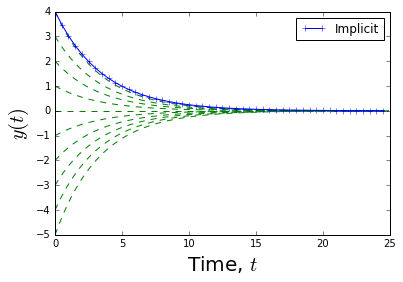

In [14]:
tMax=25
A = 0.3

# Plot the background exponential decay curves
t = np.arange(0,tMax,0.1)
y = np.exp(-t*A)
y_0 = np.arange(-5,5,1)
for i in y_0:
    plt.plot(t, i*y, '--g')

# Calculate Implicit solution
h = 0.5 # Timestep Size

t_Implicit = np.arange(0,tMax,h)
N = len(t_Implicit)

y_Implicit = np.empty_like(t_Implicit)
y_Implicit[0] = 4

for n in range(0,N-1):
    y_Implicit[n+1] = y_Implicit[n]/(1 + h*A)

plt.plot(t_Implicit,y_Implicit, "-+", label="Implicit")

plt.legend()
plt.xlabel("Time, $t$", fontsize=20)
plt.ylabel("$y(t)$", fontsize=20)

### 6.3c Crank-Nicolson Method applied to  $f=dy/dt=-Ay$

In this method we take the derivative to be valid halfway
    between $t_n$ and $t_{n+1}$ estimated by averaging the gradients $f_n$ and $f_{n+1}$

So in general: $$\frac{dy}{dt}=\frac{y_{n+1}-y_n}{\Delta t}=\frac{f_n+f_{n+1}}{2}$$

---

#### Crank-Nicolson Method applied to  $dy/dt=Ay$

So,
  $$f_n = \frac{dy_n}{dt}=-Ay_n,$$
and
  $$f_{n+1} = \frac{dy_{n+1}}{dt}=-Ay_{n+1}.$$

Substituting these into the Crank-Nicholson solution,

<div class="alert alert-block alert-success">
$$
\frac{y_{n+1}-y_n}{h}=\frac{-y_nA-y_{n+1}A}{2},
$$
</div>

Which after re-arrangement for $y_{n+1}$ gives:

<div class="alert alert-block alert-success">
$$
y_{n+1}=y_n \frac{ 1 - 0.5 A h} {1 + 0.5 A h}.
$$
</div>

<div class="alert alert-block alert-info"> **IMPORTANT:** 

<p> Crank-Nicolson is an a more precise alternative to Euler and Implicit methods
<p> Make sure you understand how it works and how to discretise equations with it.
</div>

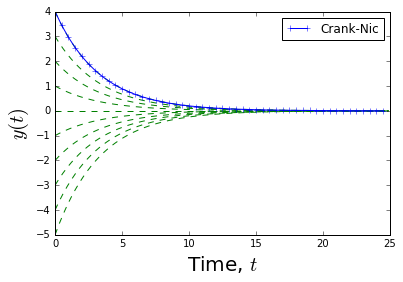

In [15]:
tMax=25
A = 0.3

# Plot the background exponential decay curves
t = np.arange(0,tMax,0.1)
y = np.exp(-t*A)
y_0 = np.arange(-5,5,1)
for i in y_0:
    plt.plot(t, i*y, '--g')

# Calculate Crank-Nicolson Solution
h = 0.5 # Timestep Size

t_CrankNic = np.arange(0,tMax,h)
N = len(t_CrankNic)

y_CrankNic = np.empty_like(t_CrankNic)
y_CrankNic[0] = 4
for n in range(0,N-1):
    y_CrankNic[n+1] = y_CrankNic[n]*(1 - 0.5*h*A)/(1 + 0.5*h*A)
    
plt.plot(t_CrankNic,y_CrankNic, "-+", label="Crank-Nic")

plt.legend()
plt.xlabel("Time, $t$", fontsize=20)
plt.ylabel("$y(t)$", fontsize=20)

---

### 6.3d Comparison of Euler, Implicit and Crank-Nicolson using widgets

Widgets are a handy way we can make dynamic graphs which update using slider bars, buttons etc. Let's have a look below:

In [16]:
def methodComparison(h):
    tMax=25
    A = 0.3

    # CALCULARE ANALYTIC SOLUTIONS AND PLOT THEM
    t = np.arange(0,tMax,0.1)
    y = np.exp(-t*A)
    y_0 = np.arange(-5,5,1)
    for i in y_0:
        plt.plot(t, i*y, '--g')
    plt.xlabel("Time, $t$", fontsize=20)
    plt.ylabel("$y(t)$", fontsize=20)

    # INITIALISE TIMESPES FOR NUMERICAL SOLUTIONS
    t_numerical = np.arange(0,tMax,h)
    N = len(t_numerical)

    # EULER METHOD
    y_Euler = np.empty_like(t_numerical)
    y_Euler[0] = 4
    for n in range(0,N-1):
        y_Euler[n+1] = y_Euler[n]*(1 - h*A)

    # IMPLICIT METHOD
    y_Implicit = np.empty_like(t_numerical)
    y_Implicit[0] = 4
    for n in range(0,N-1):
        y_Implicit[n+1] = y_Implicit[n]/(1 + h*A)
    
    # CRANK-NICOLSON
    y_CrankNic = np.empty_like(t_numerical)
    y_CrankNic[0] = 4
    for n in range(0,N-1):
        y_CrankNic[n+1] = y_CrankNic[n]*(1 - 0.5*h*A)/(1 + 0.5*h*A)
      
    plt.plot(t_numerical,y_Euler, "-+", label="Euler")
    plt.plot(t_numerical,y_Implicit, "-+", label="Implicit")
    plt.plot(t_numerical,y_CrankNic, "-+", label="Crank-Nic")
    plt.legend()

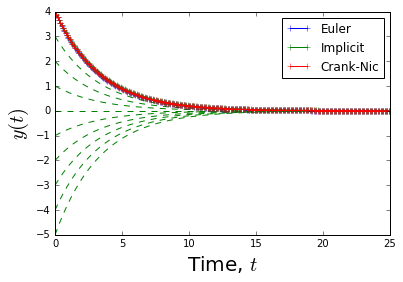

In [17]:
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

interactive(methodComparison, h=widgets.FloatSlider(value=0.1,min=0.001,max=10))

---

## 6.4 Why all these different methods? Let's do an error Analysis

Let's formally work out the error on our 3 methods:
  
1.  Forward differencing (Euler's Method)
2.  Backward Differencing (an implicit method)
3.  Crank-Nicolson

The game here is to compare the numerical solution with a Taylor expansion and see how many terms are accounted for!
  
Define $f_n=f(t_n,y_n)$,
$y'=dy/dt$ and thus $y'=f$.

Using a Taylor series we can create 2 approximations which will be helpful later:

The extrapolation to $y_{n+1}$ from $y_{n}$ is:
$$ y_{n+1}=y_n+h y_n'+\frac{h^2}{2} y_n''+\frac{h^3}{3!}y_n'''+\ldots  \; \; \; \mbox{ (3.1a) }$$

And extrapolation back to $y_{n}$ from $y_{n+1}$ is:

$$ y_{n}=y_{n+1} - h y_{n+1}'+\frac{h^2}{2} y_{n+1}''-\frac{h^3}{3!}y_n'''+\ldots \; \; \; \mbox{ (3.1b) }$$

Note, that in this second case, even terms in $h$ are positive and odd terms are negative.

We can also write these in terms of $f=y'$

$$ y_{n+1}=y_n+h f_n+\frac{h^2}{2} f_n'+\frac{h^3}{3!}f_n''+\ldots  \; \; \; \mbox{ (3.2a) }$$

$$ y_{n}=y_{n+1} - h f_{n+1}+\frac{h^2}{2} f_{n+1}'-\frac{h^3}{3!}f_n''+\ldots \; \; \; \mbox{ (3.2b) }$$



### 6.4a Errors for Euler's Method
Euler's Method uses the approximation.

$$      y_{n+1}^{Euler}\approx y_n+h y'_n
$$

Differencing between this solution and the Taylor expansion [Eqn 3.1a] gives the accuracy limit to the Euler estimate of $y_{n+1}$, which is
    $$ y_{n+1}^{Taylor} - y_{n+1}^{Euler} = \frac{h^2}{2} y_n''+\ldots=O(h^2)$$


This is $1^{st}$ order accurate as the error depends on $h^2$.

### 6.4b Errors for the Implicit Method

For the implicit method we have $y_{n+1}^{Implicit}\approx y_n+h
    f_{n+1}=y_n+h y'_{n+1}$

We can rearrange Taylor expansion [Eqn 3.1b] for $y_{n+1}$ which mimics the structure of the implicit method:
$$
y_{n+1}^{Taylor}=y_n+h y'_{n+1}-\frac{h^2}{2}y''_{n+1}+\frac{h^3}{3!}y'''_{n+1}-\ldots
$$

Differencing the Taylor expansion and the Implicit solution:

$$
y_{n+1}^{Taylor} - y_{n+1}^{Euler} = y_{n+1}+\frac{h^2}{2}y''_{n+1}+\ldots\approx y_{n+1}+O(h^2)
$$

As with Euler's Method this is $1^{st}$ order accurate.

### 6.4c Errors for Crank-Nicolson Method

For the Crank-Nicolson method we approximate 
$$y_{n+1}^{Crank}=y_n+ \frac{h}{2} \left( f_n+f_{n+1} \right)$$

Let's eliminate the terms in $f$ on the RHS by expressing them both in terms of derivatives of $y_n$. 

Firstly, $$f_n=y'_n$$

We can also express the derivative at time $n+1$ in terms of the derivative at time $n$ using a Taylor expansion:
$$
    f_{n+1}=y'_{n+1}=y'_n+hy''_n+\frac{h^2}{2}y'''_n+\ldots
$$

Substituting this into the Crank-Nicolson expression gives:
$$ y_{n+1}^{Crank}=y_n+ \frac{h}{2} \left( f_n+f_{n+1} \right)=y_n+\frac{h}{2}\left(y'_n+ \left( y'_n+hy''_n+\frac{h^2}{2}y'''_n+\ldots \right)\right) $$
  
Expanding the brackets we get. 
$$
      y_{n+1}^{Crank}=y_n+hy'_n+h^2\frac{y''_n}{2}+\frac{h^3}{4}y'''_n+\ldots
$$

and taking the difference between this and the Taylor expansion [Eqn 3.1a] we see that the solutions start to deviate at order $h^3$, 

$$y_{n+1}^{Taylor} - y_{n+1}^{Crank} = (\frac{1}{4}-\frac{1}{3!})(h^3y'''_n)+\ldots$$

This difference is
$O(h^3)$ and so the method is $2^{nd}$-order accurate.

<div class="alert alert-block alert-info"> **IMPORTANT:** 
<p>The error analysis compares a Talor expansion to an arbitary accuracy with the numerical solution.
<p>Understand how you can infer the numerical accuracy of each method by making this comparison.
</div>

---

# 7. How `odeint` works: 4th order Runge Kutta

- For Euler and implicit we approximated the gradient we would use to extrapolate with from either the current or next position.
- For Crank-Nicolson, we averaged these gradients to get a better on average gradient.
- For the midpoint method: 
- For 4th Order Runge Kutta we average 4 different slopes and combine them as a weighted average.

See section 17.1 of [Numerical Recipies](http://apps.nrbook.com/empanel/index.html#) for more details. By clicking done and going to the contents page you can access this book for free online.

## 7.1 [Midpoint Method](https://en.wikipedia.org/wiki/Midpoint_method): A 2nd order Runge-Kutta Method


Again, we want to solve the function $f(y,t)=\frac{dy}{dt}$.

A natural step to improving upon the previous methods is to compute the slope in the middle of the time interval, $t+h/2$:

$$ y_{n+1}^{Midpoint} = y_n+ h \; f_{n+1/2} = y_n+ h \; f\left(  y_n + \frac{h}{2}f(t_n, y_n) \;,\; t_n+h/2 \right) $$

<img src="http://slideplayer.com/slide/5185520/16/images/38/Midpoint+Method+Improved+Polygon+or+Modified+Euler+Method.jpg" alt="Midpoint Method" style="width: 400px;"/>
**_Figure 7.1_ Schematic of the Midpoint method which used the slope computed halfway between 2 time points and uses that to advance the solution.**

## 7.2 4th Order Runge Kutta

This is the main method used to numerically integrate differential equations.

An accurate and computationaly cheap scheme is the 4th order Runge-Kutta
scheme. This can be written as:

$$\begin{align*}
  k_1=&hf( y_n, t_n) \\
  k_2=&hf( y_n+k_1/2, t_n+h/2)\\
  k_3=&hf(y_n+k_2/2, t_n+h/2)\\
  k_4=&hf(y_n+k_3, t_n+h)\\
  y_{n+1}=&y_n+\frac{k_1}{6}+\frac{k_2}{3}+\frac{k_3}{3}+\frac{k_4}{6}+O(h^5)\\
\end{align*}$$

This scheme the derivative is estimated 4 times: 
- Once at the initial point ($k_1$), 
- Twice at trial midpoints ($k_2$, $k_3$), 
- And once at a trial endpoint ($k_4$).

This is $4^{th}$ order accurate $\left( O(h^4) \right)$ and requires four evaluations of $f$ per
per step.


<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Os_quatro_valores_da_derivada_usados_no_método_de_Runge-Kutta_de_quarta_ordem..png" alt="4th order Runge-Kutta" style="width: 400px;"/>
**_Figure 7.2_ Schematic of $4^{th}$ Order Runge-Kutta scheme**

The $4^{th}$ order Runge-Kutta requires twice as many evaluations of $f$ per timestep compared to the midpoint method. 

Therefore, it will be more efficient if the use of the $4^{th}$ Order method allows you to take a step that is at least _twice_ as large for the _same_ accuracy. 

This is usually the case - but not always!

<div class="alert alert-block alert-info"> **IMPORTANT:** 

<p>Understand that the Runga-Kutta is another, more accurate approximation of the derivative that allows you to take bigger step sizes for the same accuracy.
</div>

---

# 8. EXERCISES: 

## 8.1 Find numerical solutions to $\frac{dy}{dt}=(1-t)y$

Find the solution to to $\frac{dy}{dt}=(1-t)y$ with $y(0)=1$ in the domain $t\in (0,5)$ using:

1. Analytic solution
2. Euler Method
3. Implicit Method
4. Crank-Nicolson Method

Then compare their performance with respect to the choice of stepsize.

<div class="alert alert-block alert-success">

ANSWER:

### (1) This has an analytical solution, 

$$y=\exp{(t-t^2/2)}$$

---

### (2) Euler

$$
y_{n+1}=y_n+\Delta t (1-t_n) y_n.
$$

---

### (3) Implicit

$$\frac{dy}{dt} \approx \frac{y_{n+1}-y_n}{h}=(1-t_{n+1})y_{n+1}$$

After some rearrangement can be written as:
$$
y_{n+1}=\frac{y_n}{1-h (1-t_{n+1})}
$$

---

### (4) Crank-Nicolson

  $$f_n = \frac{dy_n}{dt}=(1-t_n)y_n,$$
and
  $$f_{n+1} = \frac{dy_{n+1}}{dt}=(1-t_{n+1})y_{n+1}.$$

Substituting these into the Crank-Nicholson solution,

$$
\frac{y_{n+1}-y_n}{\Delta t}=\frac{y_n(1-t_n)+y_{n+1}(1-t_{n+1})}{2},
$$

Which after re-arrangement for $y_{n+1}$ gives:
$$
y_{n+1}=y_n \frac{ 1 + 1/2 (1-t_n) \Delta t} {1 - 1/2 (1-t_{n+1}) \Delta t}.
$$

</div>

<div class="alert alert-block alert-success">

### Compare performance (Static)

Let's now compare the performance of Euler, Implicit and Crank against the analytic solution.

Note that all of these methods, and those to come, agree to the first order. They differ at higher orders.

</div>

/Users/mnaylor/anaconda/envs/python3/lib/python3.4/site-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in true_divide
/Users/mnaylor/anaconda/envs/python3/lib/python3.4/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in true_divide


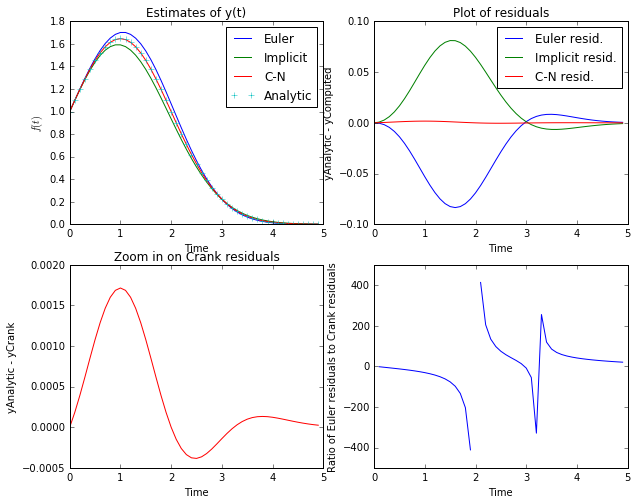

In [18]:
## ANSWER

h = 0.1               # Define the timestep
t = np.arange(0,5,h)  # Initialise an array of times
N = len(t)            # Get the number of timesteps

# Calculate The analytic solution
y_Analytic = np.exp(t-t*t/2)

# Calculate Euler's solution
y_Euler = np.empty_like(t)
y_Euler[0] = 1
for n in range(1,N):
    y_Euler[n] = y_Euler[n-1] + h * (1-t[n-1])*y_Euler[n-1]

# Calculate the Implicit Solution 
y_Implicit = np.empty_like(t)
y_Implicit[0] = 1
for n in range(1,N):
    y_Implicit[n] = y_Implicit[n-1] / (1 - h * (1-t[n]))

# Calculate the Crank-Nicholson Solution 
y_Crank = np.empty_like(t)
y_Crank[0] = 1
for n in range(1,N):
    y_Crank[n] = y_Crank[n-1] * ( 1 + h*(1-t[n-1])/2 ) / (1 - h * (1 - t[n])/2)

pylab.rcParams['figure.figsize'] = (10.0, 8.0)    
    
# Plot the solutions
plt.subplot(2,2,1)
plt.plot(t, y_Euler, label="Euler")
plt.plot(t, y_Implicit, label="Implicit")
plt.plot(t, y_Crank, label="C-N")
plt.plot(t, y_Analytic, '+', label="Analytic")
plt.ylabel(r"$f(t)$")
plt.xlabel("Time")
plt.title("Estimates of y(t)")
plt.legend(loc="upper right")

# Plot the residuals
plt.subplot(2,2,2)
plt.plot(t, y_Analytic-y_Euler, label="Euler resid.")
plt.plot(t, y_Analytic-y_Implicit, label="Implicit resid.")
plt.plot(t, y_Analytic-y_Crank, label="C-N resid.")
plt.ylabel("yAnalytic - yComputed")
plt.xlabel("Time")
plt.title("Plot of residuals")
plt.legend(loc="upper right")

# Zoom in on the residuals for Crank-Nicholson
plt.subplot(2,2,3)
plt.plot(t, y_Analytic-y_Crank, color='red')
plt.ylabel("yAnalytic - yCrank")
plt.xlabel("Time")
plt.title("Zoom in on Crank residuals")

# Plot the residuals
plt.subplot(2,2,4)
plt.plot(t, (y_Analytic-y_Euler) / (y_Analytic-y_Crank) )
plt.ylabel("Ratio of Euler residuals to Crank residuals")
plt.xlabel("Time")

<div class="alert alert-block alert-success">
### Compare performance (Widgets)
</div>

In [2]:
## ANSWER

def methodComparison(h):

    t = np.arange(0,5,h)  # Initialise an array of times
    N = len(t)            # Get the number of timesteps

    # Calculate The analytic solution
    t_analytic = np.arange(0,5,0.1)  # Initialise an array of times
    y_Analytic = np.exp(t_analytic-t_analytic*t_analytic/2)
    y_Analytic_resid = np.exp(t-t*t/2)

    # Calculate Euler's solution
    y_Euler = np.empty_like(t)
    y_Euler[0] = 1
    for n in range(1,N):
        y_Euler[n] = y_Euler[n-1] + h * (1-t[n-1])*y_Euler[n-1]

    # Calculate the Implicit Solution 
    y_Implicit = np.empty_like(t)
    y_Implicit[0] = 1
    for n in range(1,N):
        y_Implicit[n] = y_Implicit[n-1] / (1 - h * (1-t[n]))

    # Calculate the Crank-Nicholson Solution 
    y_Crank = np.empty_like(t)
    y_Crank[0] = 1
    for n in range(1,N):
        y_Crank[n] = y_Crank[n-1] * ( 1 + h*(1-t[n-1])/2 ) / (1 - h * (1 - t[n])/2)

    pylab.rcParams['figure.figsize'] = (10.0, 8.0)    

    # Plot the solutions
    plt.subplot(2,2,1)
    plt.plot(t, y_Euler, label="Euler")
    plt.plot(t, y_Implicit, label="Implicit")
    plt.plot(t, y_Crank, label="C-N")
    plt.plot(t_analytic, y_Analytic, '+', label="Analytic")
    plt.ylabel(r"$f(t)$")
    plt.xlabel("Time")
    plt.title("Estimates of y(t)")
    plt.legend(loc="upper right")

    # Plot the residuals
    plt.subplot(2,2,2)
    plt.plot(t, y_Analytic_resid-y_Euler, label="Euler resid.")
    plt.plot(t, y_Analytic_resid-y_Implicit, label="Implicit resid.")
    plt.plot(t, y_Analytic_resid-y_Crank, label="C-N resid.")
    plt.ylabel("yAnalytic - yComputed")
    plt.xlabel("Time")
    plt.title("Plot of residuals")
    plt.legend(loc="upper right")

    # Zoom in on the residuals for Crank-Nicholson
    plt.subplot(2,2,3)
    plt.plot(t, y_Analytic_resid-y_Crank, color='red')
    plt.ylabel("yAnalytic - yCrank")
    plt.xlabel("Time")
    plt.title("Zoom in on Crank residuals")

    # Plot the residuals
    plt.subplot(2,2,4)
    plt.plot(t, (y_Analytic_resid-y_Euler) / (y_Analytic_resid-y_Crank) )
    plt.ylabel("Ratio of Euler residuals to Crank residuals")
    plt.xlabel("Time")

/Users/mnaylor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide
/Users/mnaylor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide


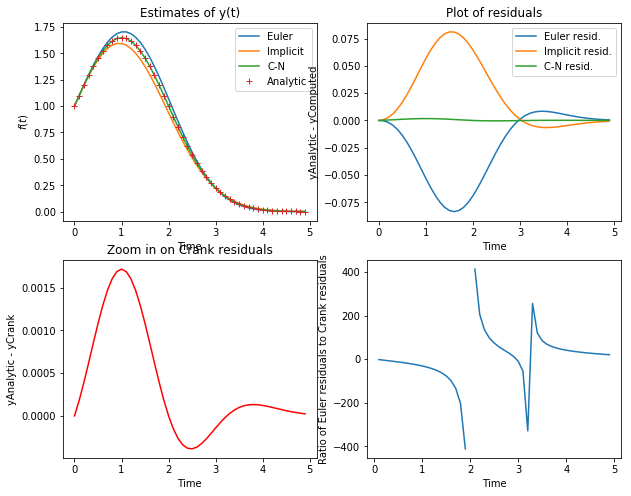

In [3]:
## ANSWER

import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

interactive(methodComparison, h=widgets.FloatSlider(value=0.1,min=0.001,max=1))


## 8.2 Find numerical solutions to $\frac{dy}{dt}= -y\sqrt(t)$

-  Apply Euler's method to $\frac{dy}{dt}= -y\sqrt(t)$ with $y(0)=1$ for $t\in(0,5)$  
-  Use a timestep of 0.25
-  Then apply the Implicit method to the same problem.
-  Compare the exact solution with the solutions you have computed.

## 8.3 Example Exam Question
  
  An Ordinary Differential Equation (ODE) can be written as
  $\frac{dy}{dt}=f(y,t)$.

1.  Write down an explicit solution for $y_{n+1}$ in terms only of
    $\Delta t$ (the timestep) and $f(y_n,t_n)$. [5 marks]
2.  Then show that this is a first-order accurate scheme [10 marks]
3.  Given the problem $\frac{dy}{dt}= (1-t)y$ outline how using
    Python and additional modules you would solve it [10 marks]